# Metadata

```{yaml}
Course:   DS 5001
Module:   02 Text Models
Topic:    Tokenizing with SciKit Learn
Author:   R.C. Alvarado
Date:     14 October 2022 (revised; orig. 18 October 2022)
```

**Purpose**: 

Demonstrate use of SciKit to perform fast tokenization. 

Note that this method does not preserver tokens per se; it extracts types and counts instances of each type (i.e. number of tokens per type).

## Set Up

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

In [4]:
sns.set()

In [5]:
data_home = "../data"

In [6]:
text_file = f"{data_home}/gutenberg/pg105.txt"

## Import text

Import source file

In [7]:
docs = pd.DataFrame(dict(doc_str=open(text_file, 'r').read().split('\n\n')))

Define lines where text begins and ends

In [8]:
a = docs[docs.doc_str.str.contains("1818")].index.values[0]
b = docs[docs.doc_str.str.contains("Finis")].index.values[0]

Select only relevant text

In [9]:
docs = docs[(docs.index > a) & (docs.index < b)]

Clean up strings

In [10]:
docs.doc_str = docs.doc_str.str.replace(r"\n+", " ", regex=True)

Remove blank lines

In [11]:
docs = docs[docs.doc_str != '']

Create index

In [12]:
docs = docs.reset_index(drop=True)
docs.index.name = 'doc_id' 

Inspect results.

Note that the "docs" are paragraphs.

In [13]:
docs

,doc_str
doc_id,
0,Chapter 1
1,"Sir Walter Elliot, of Kellynch Hall, in Somer..."
2,"""ELLIOT OF KELLYNCH HALL."
3,"""Walter Elliot, born March 1, 1760, married, J..."
4,Precisely such had the paragraph originally st...
...,...
1025,Mrs Clay's affections had overpowered her inte...
1026,It cannot be doubted that Sir Walter and Eliza...
1027,"Anne, satisfied at a very early period of Lady..."


# Vectorize Corpus

We use SciKit Learn's `CountVectorizer()` method, which as the following signature:

```
CountVectorizer(
    input='content',
    encoding='utf-8',
    decode_error='strict',
    strip_accents=None,
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    stop_words=None,
    token_pattern='(?u)\\b\\w\\w+\\b',
    ngram_range=(1, 1),
    analyzer='word',
    max_df=1.0,
    min_df=1,
    max_features=None,
    vocabulary=None,
    binary=False,
    dtype=<class 'numpy.int64'>,
)
```

This the doctring from the function:

>Convert a collection of text documents to a matrix of token counts <br/><br/>
This implementation produces a sparse representation of the counts using
scipy.sparse.csr_matrix. <br/><br/>
If you do not provide an a-priori dictionary and you do not use an analyzer
that does some kind of feature selection then the number of features will
be equal to the vocabulary size found by analyzing the data. <br/><br/>
Read more in the `User Guide <text_feature_extraction>`.


In [14]:
engine = CountVectorizer()
model = engine.fit_transform(docs.doc_str)

## Extract Count Matrix

In [18]:
X = pd.DataFrame(model.toarray(), columns=V)
X.index.name = 'doc_id'

In [19]:
X.shape

(1030, 5751)

In [20]:
X

,10,11,12,13,14,15,16,17,1760,1784,...,younker,your,yours,yourself,yourselves,youth,youthful,zeal,zealous,zealously
doc_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1027,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Extract Vocabulary

The engine provides a list of terms ...

In [25]:
# V = engine.get_feature_names()

But, it's better to get the list and the counts to create a vocabulary table.

In [44]:
V = X.sum().to_frame('n')
V.index.name = 'term_str'

In [45]:
V

,n
term_str,
10,1
11,1
12,1
13,1
14,1
...,...
youth,15
youthful,1
zeal,5


## Show Stats

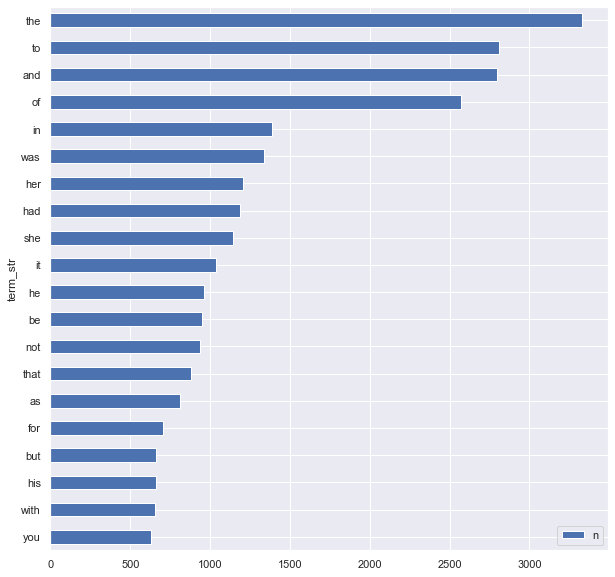

In [32]:
V.sort_values('n').tail(20).plot.barh(figsize=(10,10));

# Look at Documents

In [37]:
D = X.sum(1).to_frame('n')

In [38]:
D

,n
doc_id,
0,1
1,111
2,4
3,50
4,71
...,...
1025,76
1026,64
1027,221


In [43]:
D.describe()

,n
count,1030.000000
mean,78.564078
std,68.798485
min,1.000000
25%,28.000000
50%,60.000000
75%,109.750000
max,479.000000


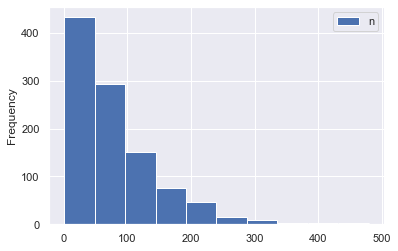

In [41]:
D.plot.hist();

# Note the Data Model

$X \rightarrow [V, D]$